In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [2]:
entire_df = pd.read_csv('data.csv')
entire_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
train, validation = train_test_split(entire_df, test_size=0.3, random_state=42)
train, test = train_test_split(train, test_size=30, random_state=42)

In [4]:
x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0:1]
y_train = y_train.values.ravel() # flattens the df to 1-dim array

x_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0:1]
y_test = y_test.values.ravel()

In [5]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [6]:
x_df = x_train
y_df = y_train

In [7]:
x_df
x_df.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

In [8]:
# Selecting the variance threshold - very low
threshold = 0.05

sel = VarianceThreshold(threshold=threshold)
transformed_features = sel.fit_transform(x_df)
selected_columns = sel.get_support(indices=True)
selected_columns = x_df.columns[selected_columns]
selected_df = x_df[selected_columns]
selected_df # df with the low variance columns removed

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,...,Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Total assets to GNP price
1250,7.710000e+09,0.000000e+00,0.000665,0.031338,6.080000e+09,0.000419,0.002866,0.013142,0.001341,0.004713,...,0.030642,0.053713,0.002811,0.000686,0.005238,0.050188,9.080000e+09,5.630000e+08,1.360000e+09,0.029459
6216,3.169596e-04,1.796329e-04,0.000382,0.011117,6.760000e+09,0.000459,0.006039,0.003156,0.000661,0.009571,...,0.004565,0.010423,0.006941,0.007774,0.005421,0.003143,1.891317e-04,1.553451e-04,1.612030e-04,0.000359
1072,1.332132e-04,1.150000e+08,0.000333,0.019450,6.800000e+09,0.000468,0.005283,0.003907,0.000929,0.006807,...,0.011988,0.011451,0.005694,0.002308,0.014825,0.013485,1.029324e-04,5.270000e+09,2.190000e+09,0.000446
2092,7.304757e-04,0.000000e+00,0.000422,0.025727,1.029631e-04,0.000710,0.016922,0.001527,0.001822,0.003470,...,0.007931,0.005733,0.017141,0.028204,0.008930,0.000000,1.428796e-04,1.281527e-04,2.005879e-04,0.000286
28,1.259281e-04,5.770000e+08,0.000822,0.019284,5.980000e+09,0.000461,0.007893,0.003979,0.000739,0.008560,...,0.012990,0.010820,0.008163,0.000851,0.019547,0.006933,1.489975e-04,8.030000e+09,8.210000e+08,0.001225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,9.990000e+09,6.520000e+09,0.000396,0.033350,7.480000e+09,0.000484,0.013313,0.002718,0.000651,0.009715,...,0.097681,0.005032,0.013772,0.008309,0.020473,0.000153,2.064606e-04,1.381267e-04,7.870000e+09,0.002805
1189,5.590000e+09,0.000000e+00,0.000764,0.031807,6.160000e+09,0.000473,0.003893,0.010675,0.000921,0.006871,...,0.033303,0.015673,0.003808,0.000109,0.003161,0.000000,1.086491e-04,8.930000e+09,2.420000e+08,0.003267
2604,1.688293e-04,0.000000e+00,0.000667,0.014898,6.440000e+08,0.000474,0.001980,0.008319,0.000550,0.011509,...,0.011333,0.034956,0.002099,0.000259,0.006605,0.003082,2.651624e-04,1.280160e-04,1.410000e+09,0.000678
2472,7.600000e+09,0.000000e+00,0.000156,0.013884,6.960000e+09,0.000499,0.004940,0.002647,0.001355,0.004669,...,0.069257,0.045905,0.005517,0.006864,0.000000,0.014349,1.017486e-04,1.126586e-04,1.319649e-04,0.084286


In [9]:
model = LogisticRegression(max_iter=10000)
model.fit(selected_df, y_train) # bow = selected_df

LogisticRegression(max_iter=10000)

In [10]:
pred = model.predict(selected_df)

In [11]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
accuracy_score(pred, y_train)

0.9681636095298335

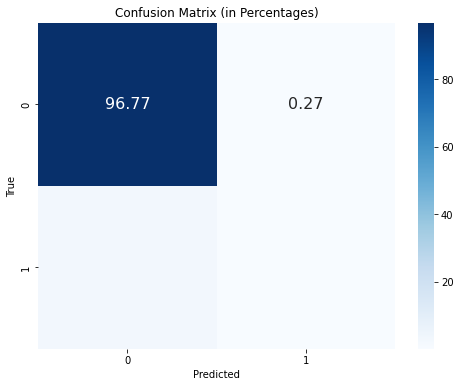

In [14]:
# plotting the confusion matrix
cm = confusion_matrix(y_train, pred)

# Calculate the total number of samples
total_samples = np.sum(cm)

# Convert the values in the confusion matrix to percentages
cm_percent = (cm / total_samples) * 100

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (in Percentages)')
plt.show()


In [15]:
x_test = x_test[selected_columns]

pred = model.predict(x_test)

In [16]:
accuracy_score(pred, y_test)

0.9666666666666667

In [17]:
model

LogisticRegression(max_iter=10000)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you already have pred and y_test
# Compute accuracy
accuracy = accuracy_score(y_test, pred)

# Compute precision
precision = precision_score(y_test, pred)

# Compute recall
recall = recall_score(y_test, pred)

# Compute F1-score
f1 = f1_score(y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9666666666666667
Precision: 1.0
Recall: 0.5
F1-score: 0.6666666666666666


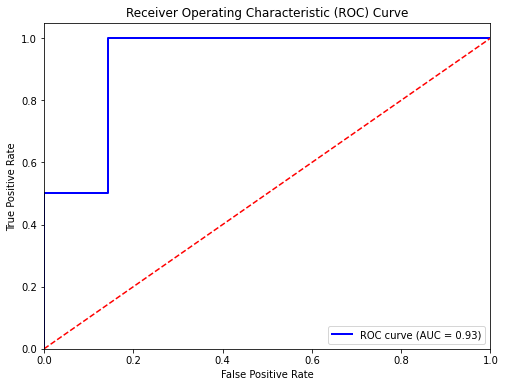

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities of the positive class
probs = model.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the AUC score
auc = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Podejrzanie dobre wynik - może zacznijmy z wagą

In [20]:
model = LogisticRegression(max_iter=10000, class_weight='balanced')
model.fit(selected_df, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [21]:
pred = model.predict(x_test)

# Assuming you already have pred and y_test
# Compute accuracy
accuracy = accuracy_score(y_test, pred)

# Compute precision
precision = precision_score(y_test, pred)

# Compute recall
recall = recall_score(y_test, pred)

# Compute F1-score
f1 = f1_score(y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9
Precision: 0.4
Recall: 1.0
F1-score: 0.5714285714285715


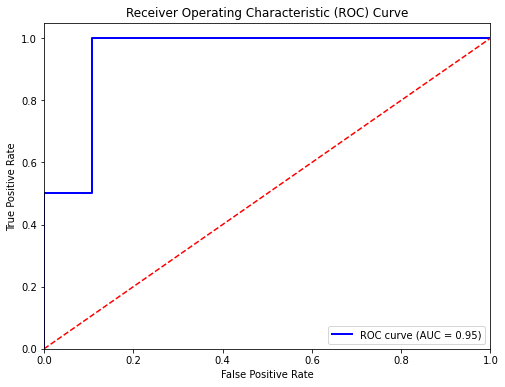

In [22]:
# Calculate the probabilities of the positive class
probs = model.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the AUC score
auc = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()